<a href="https://colab.research.google.com/github/Girija-Tandon/Python_Analysis/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/synthetic_social_media_data.csv')

In [3]:
df.head(5)

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


##                                  ** EDA **
NUMERICAL COLS:NUMBER OF LIKES,NUMBER OF SHARES,NUMBER OF COMMENTS,USER FOLLOWER COUNT,POST DATE AND TIME.

CATEGORICAL COLS : POST CONTENT,SENTIMENT LABEL,POST TYPE,LANGUAGE

MIXED COLS :POST ID
      




NUMBER OF LIKES

CONCLUSION:

In [4]:
#Number of Likes
df['Number of Likes'].describe()

,Number of Likes
count,2000.000000
mean,503.379000
std,283.210866
min,1.000000
25%,267.000000
50%,505.000000
75%,740.000000
max,1000.000000


In [5]:
df['Number of Likes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: Number of Likes
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


In [6]:
df['Number of Likes'].isnull().sum()

np.int64(0)

<Axes: ylabel='Density'>

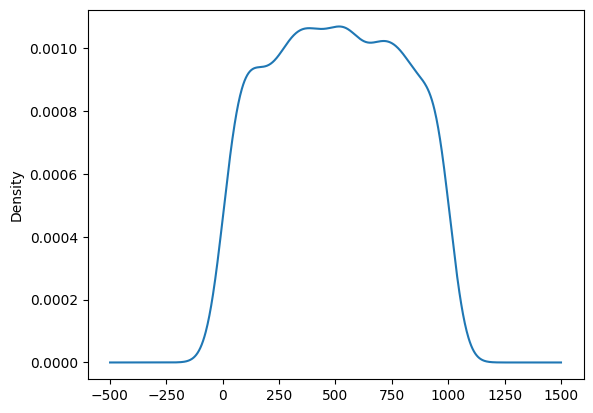

In [8]:
df['Number of Likes'].plot(kind = 'kde')

<Axes: >

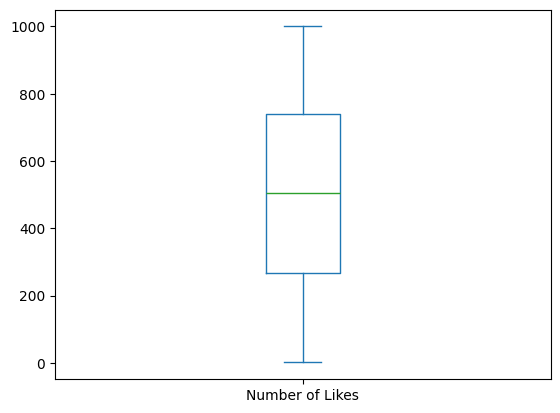

In [9]:
df['Number of Likes'].plot(kind = 'box')

NUMBER OF COMMENTS

CONCLUSION:

Min = 0: Some posts had no comments.

Median = 104.5: Half the posts had more than ~104 comments, half had less.

Max = 200: The highest comment count observed is 200.

Mean ≈ 102.8 and Std Dev ≈ 58 indicate moderately spread-out values.

Since Mean ≈ Median, the distribution is likely roughly symmetric, not heavily skewed.

In [10]:
df['Number of Comments'].describe()

,Number of Comments
count,2000.000000
mean,102.805000
std,58.032886
min,0.000000
25%,52.000000
50%,104.500000
75%,153.250000
max,200.000000


In [11]:
df['Number of Comments'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: Number of Comments
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


<Axes: >

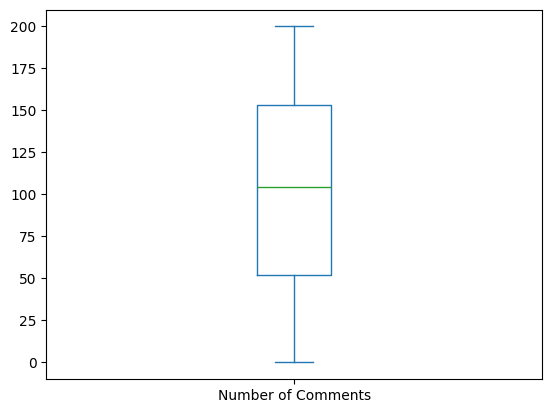

In [12]:
df['Number of Comments'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

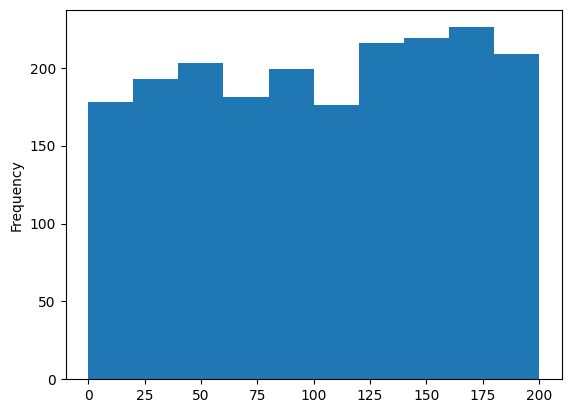

In [13]:
df['Number of Comments'].plot(kind = 'hist')

<Axes: ylabel='Density'>

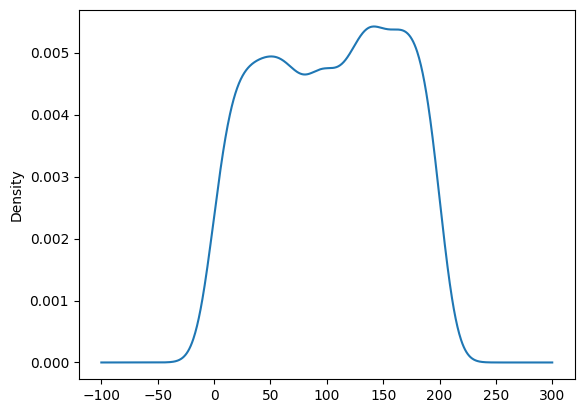

In [14]:
df['Number of Comments'].plot(kind = 'kde')

**LANGUAGE**

CONCULSION:

The distribution has a longer tail on the left side (some lower values pulling the mean down).

But since it's close to -0.5 to -0.7, it's only moderately skewed.

In [21]:
df['Language'].describe()

,Language
count,2000
unique,5
top,es
freq,431


In [22]:
df['Language'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: Language
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [23]:
df['Language'].isnull().sum()

np.int64(0)

In [27]:
df['Language'].value_counts()

,count
Language,
es,431
de,424
en,421
fr,370
zh,354


<Axes: xlabel='Language'>

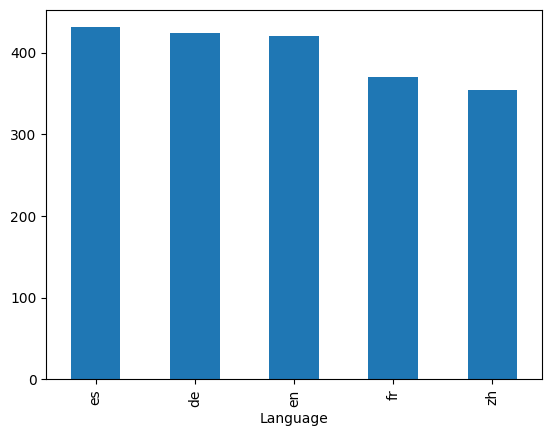

In [15]:
df['Language'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

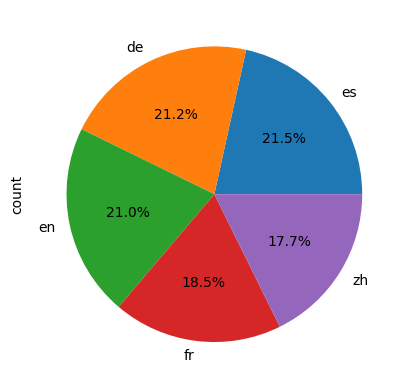

In [17]:
df['Language'].value_counts().plot(kind = 'pie',autopct ='%0.1f%%')

<Axes: ylabel='Density'>

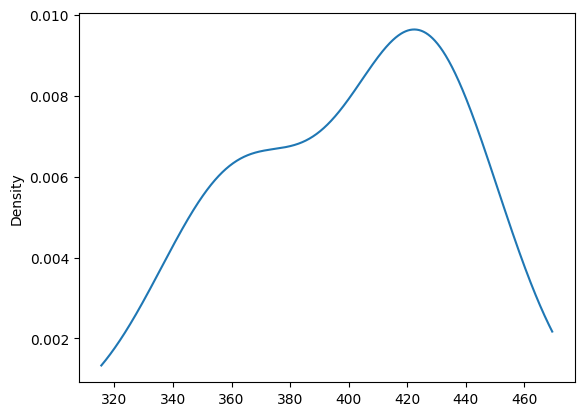

In [20]:
df['Language'].value_counts().plot(kind = 'kde')

In [25]:
df['Language'].value_counts().skew()

np.float64(-0.6749458791533168)

In [28]:
pd.crosstab(df['Sentiment Label'],df['Post Type'])

Post Type,image,text,video
Sentiment Label,,,
Negative,245,218,212
Neutral,235,216,231
Positive,204,216,223


<Axes: xlabel='Post Type', ylabel='Sentiment Label'>

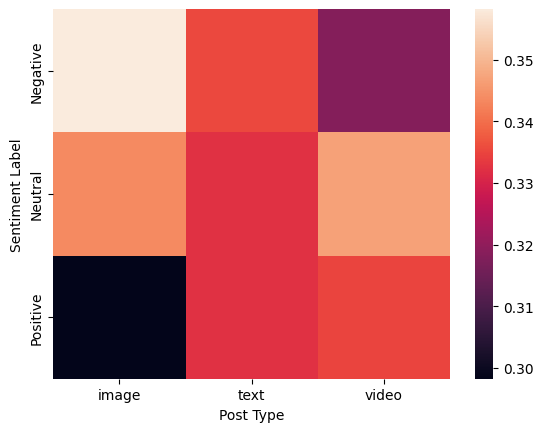

In [32]:
import seaborn as sns
sns.heatmap(pd.crosstab(df['Sentiment Label'],df['Post Type'],normalize='columns'))

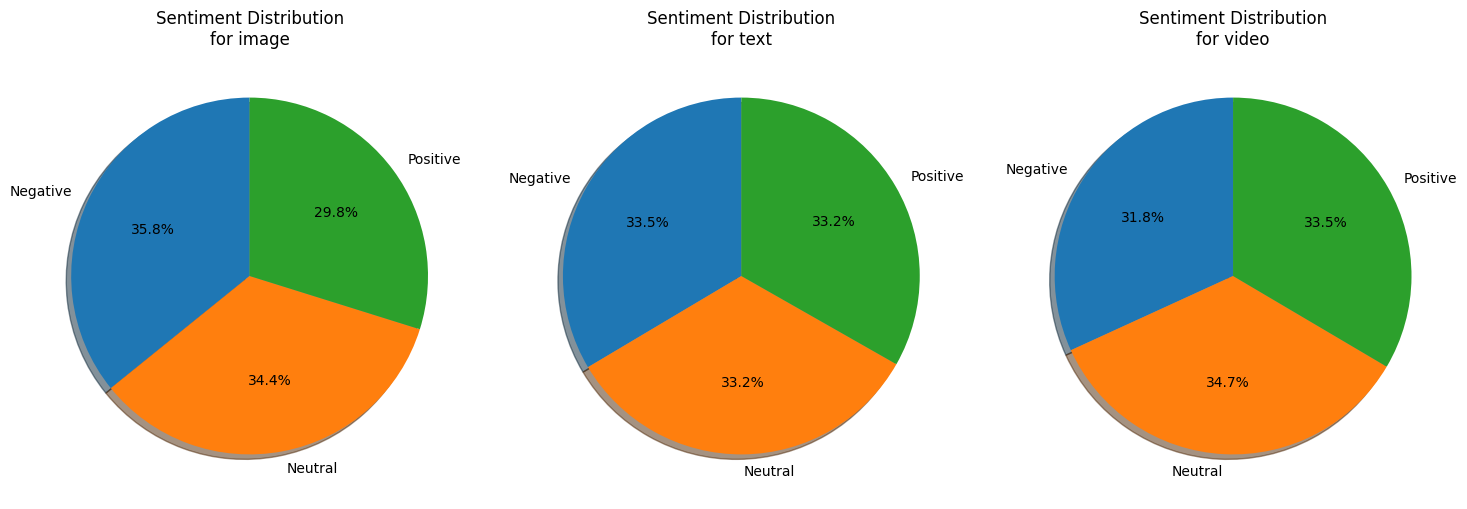

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Create normalized cross-tab
crosstab = pd.crosstab(df['Sentiment Label'], df['Post Type'], normalize='columns')

# Plot a pie chart for each Post Type
post_types = crosstab.columns
n = len(post_types)

# Set up subplots
fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))  # 1 row, n columns

if n == 1:
    axes = [axes]  # Make sure axes is iterable even for 1 chart

# Create a pie chart for each column (Post Type)
for i, post_type in enumerate(post_types):
    axes[i].pie(
        crosstab[post_type],
        labels=crosstab.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )
    axes[i].set_title(f'Sentiment Distribution\nfor {post_type}')

plt.tight_layout()
plt.show()


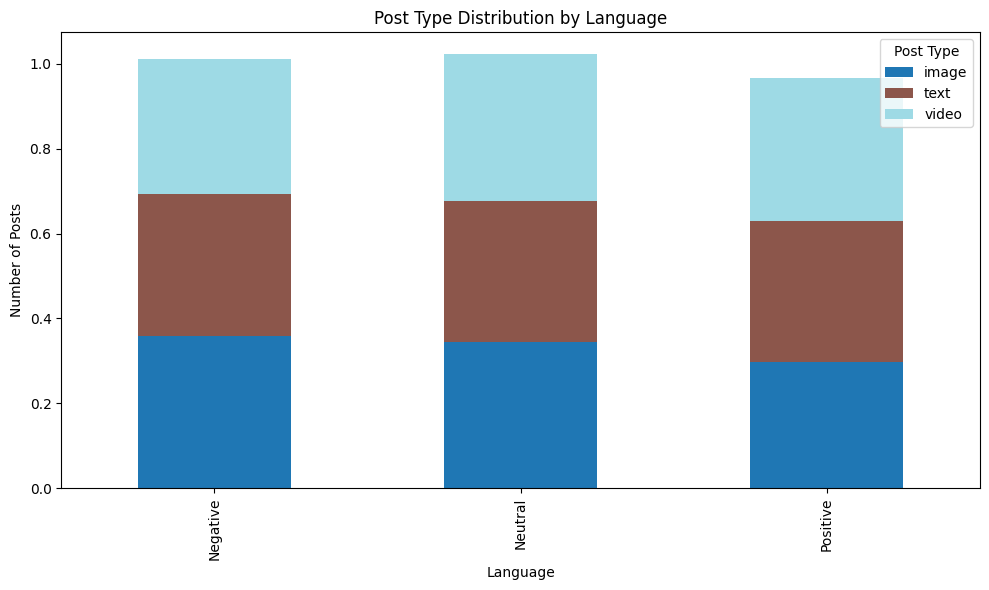

In [35]:
# Plot stacked bar chart
crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.title('Post Type Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()


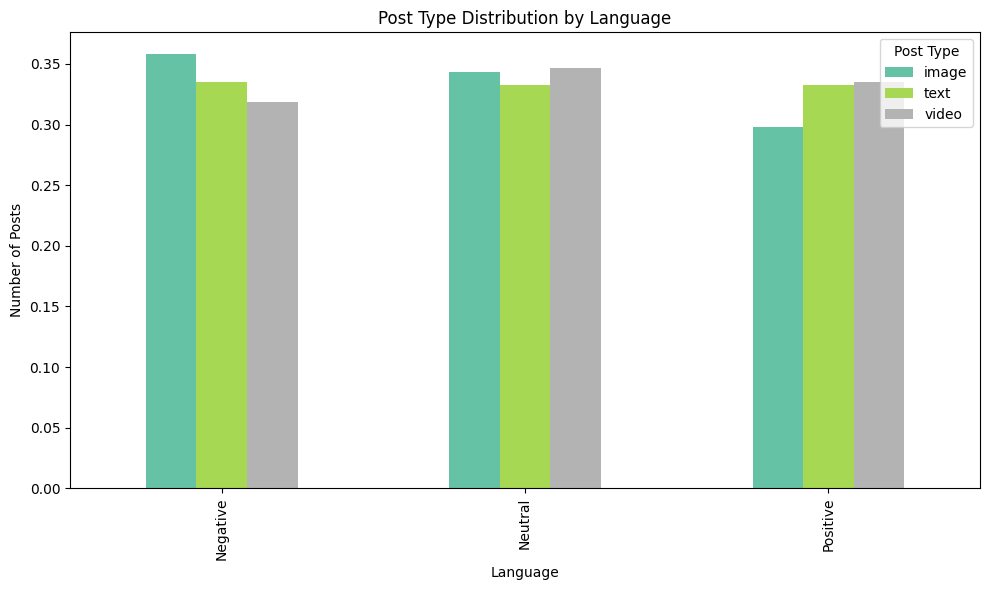

In [36]:
# Plot grouped bar chart
crosstab.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    colormap='Set2'
)

plt.title('Post Type Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.legend(title='Post Type')
plt.tight_layout()
plt.show()
